In [1]:
import json
import random

import matplotlib.pyplot as plt
import networkx as nx

from vu_models import Topics, Topic

In [2]:
topics_file = "math_102_JUNE_21_topics.json"
topics = Topics(**json.load(open(topics_file)))

In [8]:
def create_tree(topic: Topic):
    tree = nx.DiGraph()
    tree.add_node(topic.id)
    for subtopic in topic.subtopics.values():
        tree.add_edge(topic.id, subtopic.id)
        for concept in subtopic.concepts.values():
            tree.add_edge(subtopic.id, concept.id)
            for question in concept.questions.values():
                tree.add_edge(concept.id, question.id)
    return tree

In [9]:
trees = [create_tree(topic) for topic in topics.topics.values()]
tree = nx.compose_all(trees)
all_nodes = list(tree.nodes)

In [15]:
def create_tree_with_node_positions(
    topics: Topics, horizontal_delta: float = 0.75, vertical_delta: int = 3
):
    sep = "_"
    pos = {}
    trees = [create_tree(topic) for topic in topics.topics.values()]
    tree = nx.compose_all(trees)
    all_nodes = list(tree.nodes)
    leaf_nodes = [x for x in all_nodes if (x.count(sep) == 3)]

    num_rows, num_cols = 15, int(horizontal_delta * (len(leaf_nodes) + 1))

    #
    #  assign pos to questions
    #
    i = 1
    leaf_vertical_pos = 2
    for lf in leaf_nodes:
        pos[lf] = (i, leaf_vertical_pos)
        i += horizontal_delta
    #
    #  assign pos to loc
    #
    loc_vertical_pos = leaf_vertical_pos + vertical_delta
    loc_nodes = [x for x in all_nodes if (x.count(sep) == 2)]
    loc_start_pos = 1

    for loc_node in loc_nodes:
        num_loc_leaf_nodes = len(
            [x for x in all_nodes if (x.startswith(loc_node) and x.count(sep) == 3)]
        )
        loc_node_h_pos = loc_start_pos + int(
            0.5 * num_loc_leaf_nodes * horizontal_delta
        )
        pos[loc_node] = (loc_node_h_pos, loc_vertical_pos)
        loc_start_pos += num_loc_leaf_nodes * horizontal_delta
    #
    #  assign pos to subtopics
    #
    subtopics_vertical_pos = loc_vertical_pos + vertical_delta
    subtopics_nodes = [x for x in all_nodes if (x.count(sep) == 1)]
    subtopic_start_pos = 1

    for subtopic_node in subtopics_nodes:
        num_subtopic_leaf_nodes = len(
            [
                x
                for x in all_nodes
                if (x.startswith(subtopic_node) and x.count(sep) == 3)
            ]
        )
        subtopic_node_h_pos = subtopic_start_pos + int(
            0.5 * num_subtopic_leaf_nodes * horizontal_delta
        )
        pos[subtopic_node] = (subtopic_node_h_pos, subtopics_vertical_pos)
        subtopic_start_pos += num_subtopic_leaf_nodes * horizontal_delta
    #
    #  assign pos to subtopics
    #
    topics_vertical_pos = subtopics_vertical_pos + vertical_delta
    topics_nodes = [x for x in all_nodes if (x.count(sep) == 0)]
    topic_start_pos = 1

    for topic_node in topics_nodes:
        topic_leaf_nodes = [
            x for x in all_nodes if (x.startswith(topic_node) and x.count(sep) == 3)
        ]
        if topic_leaf_nodes:
            first_leaf_node = topic_leaf_nodes[0]
            last_leaf_node = topic_leaf_nodes[-1]
            topic_node_h_pos = topic_start_pos + int(
                0.5 * (pos[first_leaf_node][0] + pos[last_leaf_node][0])
            )
            pos[topic_node] = (topic_node_h_pos, topics_vertical_pos)
        else:
            pos[topic_node] = (topic_start_pos, topics_vertical_pos)

    return tree, num_rows, num_cols, pos

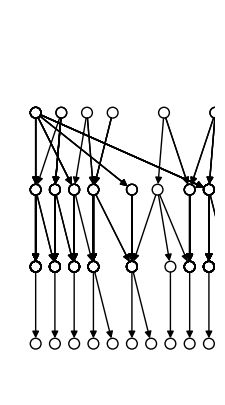

In [16]:
tree, num_rows, num_cols, pos = create_tree_with_node_positions(topics=topics)

# Create a figure and axis
fig, ax = plt.subplots(figsize=(250, 5))  # Adjust the figsize for better visibility

# Draw the grid lines
"""
for row in range(rows + 1):
    ax.axhline(row, color='black', linewidth=0.5)

for col in range(cols + 1):
    ax.axvline(col, color='black', linewidth=0.5)
"""
# Set the limits and aspect ratio
ax.set_xlim(0, num_cols)
ax.set_ylim(0, num_rows)
ax.set_aspect("equal")

# Turn off the axis labels
ax.axis("off")


# Draw the tree on the grid

nx.draw(
    tree,
    pos,
    with_labels=False,
    node_color="none",
    edgecolors="black",
    node_size=60,
    ax=ax,
)
# nx.draw(G, pos, with_labels=False, node_color='none', edgecolors='black', node_size=500, ax=ax)

# Display the plot
plt.show()